In [1]:
from bs4 import BeautifulSoup
from multiprocessing.pool import ThreadPool
import numpy as np
import pandas as pd
import make_data
import datetime
import requests
import glob
import sys
import os
import json
import time
import re
import glob
import gensim as gs

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier, NearestNeighbors
from sklearn.cross_validation import cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import RidgeClassifier, LinearRegression, LogisticRegression
from sklearn.cluster import KMeans

/home/adil/.pyenv/versions/3.6.1/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
tree = np.load('data/tree.npy')

In [4]:
def dfs(tree, parents, childrens):
    mas = []
    if tree['children'] != None:
        for i in tree['children']:
            parents[i['a_attr']['title'].split('.')[0]] = tree['a_attr']['title'].split('.')[0]
            mas.extend([i['a_attr']['title'].split('.')[0]])
            dfs(i, parents, childrens)
    childrens[tree['a_attr']['title'].split('.')[0]] = mas

parents = {'0':'0'}
childrens = {}
for i in tree:
    parents[i['a_attr']['title'].split('.')[0]] = '0'
    dfs(i, parents, childrens)

In [5]:
names = {}
names[91] = [91, 111, 106, 104, 101, 327, 331, 332, 335, 94, 346, 348, 352, 401, 798, 92, 245, 325, 97, 1198, 1124, 1126, 1205, 1206, 1183, 1204]
names[1186] = [1186, 1187, 1188]
names[1190] = [1190, 1191]
names[90] = [90, 147, 159, 161, 1080, 157, 1081, 1100, 1101, 1102, 1103, 150, 173, 174, 175, 443, 1099, 154, 176, 177, 178, 179, 180, 156, 158, 162, 163, 1104, 1237, 164, 165, 166, 167, 916, 919, 168, 169, 170, 171, 172, 917, 918, 1105]
names[89] = [89, 141, 142, 143, 139, 136, 137, 138, 133, 135, 134, 131, 126, 130, 129, 127, 128, 123, 125, 124, 116, 122, 119, 121, 120, 117, 118, 936, 105, 114, 115, 113, 112, 110, 108, 107, 937, 103, 93, 98, 102, 99, 100, 96, 95, 132, 144, 145, 146, 148, 149, 151, 152, 153]
names[457] = [457, 458, 637, 638, 459, 460, 461, 639, 640, 462, 464, 641, 466, 595, 596, 597, 636]
names[181] = [181, 182, 193, 200, 446, 197, 218, 219, 220, 221, 222, 223, 224, 225, 198, 201, 235, 202, 240, 243, 448, 449, 451, 452, 203, 204, 445, 970, 226, 228, 229, 230, 231, 227, 199]
names[249] = [249, 250, 263, 274, 276, 277, 1388, 1422, 292, 1389, 303, 306, 307, 308, 1384, 1385, 1386, 1387, 310, 312, 314, 316, 1424, 1145]
names[405] = [405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 456, 419, 420, 421, 422, 838, 839, 840, 841, 842, 843, 884, 423, 424, 425, 426, 427, 1497, 428, 429, 430, 997, 1028, 1029, 1030, 1031, 1046, 1144, 1121, 1127, 1261, 1262, 1334, 1430]
names[431] = [431, 1189, 432, 433, 435, 436, 437, 439, 442, 453, 454, 1079]
names[705] = [705, 194, 196, 210, 1499, 1500, 1501, 706, 707, 708, 709, 711, 725, 712, 713, 714, 715, 716, 717, 767, 768, 1143, 1214, 1345, 720, 721, 722, 1213, 723]
names[474] = [474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507]
names[560] = [560, 563, 564, 566, 570, 589, 1074, 576, 585, 578, 586, 579, 587, 583, 590, 591, 592, 1082]
names[598] = [598, 508, 509, 535, 510, 538, 1463, 539, 540, 547, 553, 554, 557, 573, 581, 1390, 892, 1219, 1377, 1234, 601, 600, 603, 1464, 1465, 604, 1220, 1397, 1221, 1223, 613, 629, 1240, 1241, 1242, 1243, 1244, 1250, 1289, 614, 615, 616, 617, 618, 620, 621, 1327, 630, 1245, 1323, 1328, 631, 1320, 1321, 1322, 634, 1247, 1248, 1249, 1083, 619, 1292, 1294, 1084, 1326, 1286, 1288, 1290, 622, 623, 624, 625, 626, 627, 628, 635, 1291, 1295, 1299, 1316, 1317, 632, 1246, 1252, 1253, 1254, 1255, 633, 1296, 1297, 1298, 1318, 1319, 1324, 1325, 1287, 1293, 1236, 1376, 1461, 1462]
names[642] = [642, 643, 648, 649, 1182, 650, 959, 651, 652, 1157, 653, 654, 759, 644, 655, 1158, 656, 657, 658, 645, 659, 660, 1227, 647, 664, 1235, 1348, 1378, 1353, 1356, 1355, 1360, 1362, 1365, 1366, 1367, 1368, 1382, 1383, 1369, 1370, 1371, 1372, 661, 646, 662, 663, 799, 1132, 1133]
names[668] = [668, 669, 674, 1229, 672, 673, 676, 677, 695, 697, 698, 699, 700, 670, 678, 679, 680, 683, 701, 702, 703, 704, 681, 1215, 1216, 1217, 1315]
names[728] = [728, 729, 730, 732, 733, 769, 770, 771, 772, 773, 774, 775, 776, 1222, 734, 738, 739, 762, 743, 745, 747, 748, 764, 744, 749, 754, 755, 757, 750, 752, 753]

In [6]:
len(names[598])

101

In [7]:
def getData(tree, names, allUrls, parent_numb, st):
    dataUrls = []
    dataText = []
    dataCategories = []
    
    number = int(tree['a_attr']['title'].split('.')[0])
    if number in names and number in files:
        f = open('data/filterData/categories/{}.txt'.format(number))
        lines = f.readlines()
        categUrls = [i.split(', ', 1)[0] for i in lines]
        categText = [i.split(', ', 1)[1] for i in lines]
        f.close()
        
        for i in range(len(categUrls)):
            if categUrls[i] not in allUrls:
                dataUrls.extend([categUrls[i]])
                dataText.append([categText[i].replace('\n', '')])
                dataCategories.extend([number])

                allUrls.add(categUrls[i])
            
    if len(tree['children']) != 0:
        for i in tree['children']:
            a, b, c = getData(i, names, allUrls, number, st)
            dataUrls.extend(a)
            dataText.extend(b)
            dataCategories.extend(c)
    
    else:
        if number in names and number in files \
            and (len(categUrls) - len(dataUrls)) / len(categUrls) > 0.8:
            dataCategories = (np.ones(len(dataCategories)) * parent_numb).tolist()

    return dataUrls, dataText, dataCategories

In [8]:
files = glob.glob('data/filterData/categories/*')
files = [int(i[27:].split('.')[0]) for i in files]

In [9]:
allParents = {}
for j in names:
    allUrls = set()
    dataUrls = []
    dataText = []
    dataCategories = []
    st = '    '
    parent_numb = 1
    for i in tree:
        a, b, c = getData(i, names[j], allUrls, parent_numb, st)
        dataUrls.extend(a)
        dataText.extend(b)
        dataCategories.extend(c)
    
#     dataUrls = np.array(dataUrls)
#     dataText = np.array(dataText,  dtype='O')
#     dataCategories = np.array(dataCategories)

    allParents[j] = (dataUrls, dataText, dataCategories)

In [10]:
testAns = np.load('data/filterData/TestAns.npy')
testUrl = [i[0] for i in testAns]

In [11]:
testText = []
testCategories = []
for i in testUrl:
    txt = ''
    cat = 0
    for j in allParents:
        if i in allParents[j][0]:
            idx = allParents[j][0].index(i)
            txt = allParents[j][1][idx]
            cat = allParents[j][2][idx]
            
            del allParents[j][0][idx]
            del allParents[j][1][idx]
            del allParents[j][2][idx]
    
    testText.extend([txt])
    testCategories.extend([cat])
testText = np.array(testText, dtype='O')

In [12]:
# features = {}
# _time = time.time()
# for k in allParents:
#     texts = allParents[k][1]
    
#     texts = [i[0] for i in texts]
    
#     tfidfTransformer = TfidfVectorizer()
#     tfidf = tfidfTransformer.fit_transform(texts)
    
#     features[k] = (tfidf, tfidfTransformer, allParents[k][2])

# print(time.time() - _time)

In [13]:
# n_clusters = 2000
# features = {}
# _time = time.time()
# for k in allParents:
#     _time2 = time.time()
#     texts = allParents[k][1]
    
#     textsTokens = np.array([i[0].split() for i in texts])
    
#     model_w2v = gs.models.Word2Vec(textsTokens)
#     words = np.array(model_w2v.wv.index2word)
#     words_vec = np.array([model_w2v[i] for i in words])
    
#     kmeans = KMeans(n_clusters=n_clusters, n_jobs=1, n_init=1)#, random_state=0)
#     kmeans.fit(words_vec)
#     words_labels = kmeans.labels_
    
#     words_dict = dict()
#     for i, word in enumerate(words):
#         words_dict[word] = np.array([words_labels[i]], dtype='O')
    
#     trainFeatures = np.zeros((textsTokens.shape[0]), dtype='O')
#     for i in range(textsTokens.shape[0]):
#         trainFeatures[i] = ''
#         for j in textsTokens[i]:
#             if j in model_w2v:
#                 trainFeatures[i] += str(words_dict[j][0]) + ' '
    
#     tfidfTransformer = TfidfVectorizer()
#     trainFeatures  = tfidfTransformer.fit_transform(trainFeatures)
#     testFeatures = tfidfTransformer.transform(testFeatures)

#     features[k] = (trainFeatures, words_dict, tfidfTransformer, allParents[k][2])
#     print(k, time.time() - _time2)
# print(time.time() - _time)

In [14]:
# n_clusters = 2000
# features = {}
# _time = time.time()
# k = 598
# # for k in allParents:
# _time2 = time.time()
# texts = allParents[k][1]

# textsTokens = np.array([i[0].split() for i in texts])

# model_w2v = gs.models.Word2Vec(textsTokens)
# words = np.array(model_w2v.wv.index2word)
# words_vec = np.array([model_w2v[i] for i in words])

# kmeans = KMeans(n_clusters=n_clusters, n_jobs=1, n_init=1)#, random_state=0)
# kmeans.fit(words_vec)
# words_labels = kmeans.labels_

# words_dict = dict()
# for i, word in enumerate(words):
#     words_dict[word] = np.array([words_labels[i]], dtype='O')

# trainFeatures = np.zeros((textsTokens.shape[0]), dtype='O')
# for i in range(textsTokens.shape[0]):
#     trainFeatures[i] = ''
#     for j in textsTokens[i]:
#         if j in model_w2v:
#             trainFeatures[i] += str(words_dict[j][0]) + ' '

# tfidfTransformer = TfidfVectorizer()
# trainFeatures  = tfidfTransformer.fit_transform(trainFeatures)

# features[k] = (trainFeatures, words_dict, tfidfTransformer, allParents[k][2])
# print(k, time.time() - _time2)
# print(time.time() - _time)

In [15]:
# n_clusters = 2000
# features = {}
# _time = time.time()
# k = 598
# # for k in allParents:
# _time2 = time.time()
# texts = allParents[k][1]

# textsTokens = np.array([i[0].split() for i in texts])

# model_w2v = gs.models.Word2Vec(textsTokens)
# words = np.array(model_w2v.wv.index2word)
# words_vec = np.array([model_w2v[i] for i in words])

# kmeans = KMeans(n_clusters=n_clusters, n_jobs=1, n_init=1)#, random_state=0)
# kmeans.fit(words_vec)
# words_labels = kmeans.labels_

# words_dict = dict()
# for i, word in enumerate(words):
#     words_dict[word] = np.array([words_labels[i]], dtype='O')

# trainFeatures = np.zeros((textsTokens.shape[0]), dtype='O')
# for i in range(textsTokens.shape[0]):
#     trainFeatures[i] = ''
#     for j in textsTokens[i]:
#         if j in model_w2v:
#             trainFeatures[i] += str(words_dict[j][0]) + ' '

# tfidfTransformer = TfidfVectorizer()
# trainFeatures  = tfidfTransformer.fit_transform(trainFeatures)

# features[k] = (trainFeatures, words_dict, tfidfTransformer, allParents[k][2])
# print(k, time.time() - _time2)
# print(time.time() - _time)

# key = 598
# X, wdict, tfidfTransformer, y = features[key]

# clfRC = RidgeClassifier()
# clfRC.fit(X, y)

In [17]:
masss = [1, 500, 1000, 2000, 3000, 4000]

In [18]:
answer = np.zeros((len(names), len(masss), 2))

In [19]:
ansStr = 'RC.npy'
np.save('answer_table'+ansStr, answer)

In [20]:
for ik, key in enumerate(names.keys()):
    print(key)
    for inn, n_clusters in enumerate(masss):
        texts = allParents[key][1]
        if n_clusters == 1:
            texts = [i[0] for i in texts]
            tfidfTransformer = TfidfVectorizer()
            tfidf = tfidfTransformer.fit_transform(texts)
            X, tfidfTransformer, y = (tfidf, tfidfTransformer, allParents[key][2])
        else:
            textsTokens = np.array([i[0].split() for i in texts])

            model_w2v = gs.models.Word2Vec(textsTokens)
            words = np.array(model_w2v.wv.index2word)
            words_vec = np.array([model_w2v[i] for i in words])

            kmeans = KMeans(n_clusters=n_clusters, n_jobs=1, n_init=1)#, random_state=0)
            kmeans.fit(words_vec)
            words_labels = kmeans.labels_

            words_dict = dict()
            for i, word in enumerate(words):
                words_dict[word] = np.array([words_labels[i]], dtype='O')

            trainFeatures = np.zeros((textsTokens.shape[0]), dtype='O')
            for i in range(textsTokens.shape[0]):
                trainFeatures[i] = ''
                for j in textsTokens[i]:
                    if j in model_w2v:
                        trainFeatures[i] += str(words_dict[j][0]) + ' '

            tfidfTransformer = TfidfVectorizer()
            trainFeatures  = tfidfTransformer.fit_transform(trainFeatures)

            X, wdict, tfidfTransformer, y = (trainFeatures, words_dict, tfidfTransformer, allParents[key][2])

        clfRC = RidgeClassifier()
        clfRC.fit(X, y)

        predict = np.load('data/filterData/multilevel/predict'+ansStr)
        
        idx = np.where(predict == key)[0]
        if idx.shape[0] != 0:
            testX = testText[idx]
            testCategories1 = np.array(testCategories)[idx]
            if n_clusters == 1:
                testX = tfidfTransformer.transform([i[0] for i in testX])
                predict = clfRC.predict(testX)
            else:
                testX = np.array([i[0].split() for i in testX])
                testFeat = np.zeros((testX.shape[0]), dtype='O')
                for k in range(testX.shape[0]):
                    testFeat[k] = ''
                    for j in testX[k]:
                        if j in wdict:
                            testFeat[k] += str(wdict[j][0]) + ' '

                testFeat = tfidfTransformer.transform(testFeat) 
                predict = clfRC.predict(testFeat)

        sm = 0
        print(n_clusters)
        answer[ik, inn, 0] = round(accuracy_score(testCategories1, predict), 4)
        for i in range(len(testCategories1)):
            if testCategories1[i] == predict[i] or \
                parents[str(int(testCategories1[i]))] == str(int(predict[i])) or\
                str(int(predict[i])) in childrens[str(int(testCategories1[i]))]:
                sm += 1
        answer[ik, inn, 1] = round(sm / len(testCategories1), 4)
        np.save('answer_table'+ansStr, answer)
    print()

91
1
500
1000
2000
3000
4000

1186
1
500
1000
2000
3000
4000

1190
1
500
1000
2000
3000
4000

90
1
500
1000
2000
3000
4000

89
1
500
1000
2000
3000
4000

457
1
500
1000
2000
3000
4000

181
1
500
1000
2000
3000
4000

249
1
500
1000
2000
3000
4000

405
1
500
1000
2000
3000
4000

431
1
500
1000
2000
3000
4000

705
1
500
1000
2000
3000
4000

474
1
500
1000
2000
3000
4000

560
1
500
1000
2000
3000
4000

598
1
500
1000
2000
3000
4000

642
1
500
1000
2000
3000
4000

668
1
500
1000
2000
3000
4000

728
1
500
1000
2000
3000
4000



In [19]:
masss = [91]
for kk in masss:
    features = {}
    _time = time.time()
    k = kk
    key = kk
    # for k in allParents:
    _time2 = time.time()
    texts = allParents[k][1]
    
    texts = [i[0] for i in texts]
    
    tfidfTransformer = TfidfVectorizer()
    tfidf = tfidfTransformer.fit_transform(texts)
    
    features[k] = (tfidf, tfidfTransformer, allParents[k][2])
#     print(k, time.time() - _time2)
#     print(time.time() - _time)

    X, tfidfTransformer, y = features[key]

    clfRC = RidgeClassifier()
    clfRC.fit(X, y)
    
    predict = np.load('data/filterData/multilevel/predictLR.npy')
    
    idx = np.where(predict == key)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testCategories1 = np.array(testCategories)[idx]
        testX = tfidfTransformer.transform([i[0] for i in testX])

        predict = clfRC.predict(testX)

    sm = 0
    print('tfidf', key)
    print(accuracy_score(testCategories1, predict))
    for i in range(len(testCategories1)):
        if testCategories1[i] == predict[i] or \
            parents[str(int(testCategories1[i]))] == str(int(predict[i])) or\
            str(int(predict[i])) in childrens[str(int(testCategories1[i]))]:
            sm += 1
    print(sm / len(testCategories1))
    print()

tfidf 91
0.673076923077
0.7628205128205128



In [64]:
massk = [91, 431, 598]
masss = [500, 1000, 2000, 3000]
for kk in massk:
    print(kk)
    for n_clusters in masss:
        features = {}
        _time = time.time()
        k = kk
        key = kk
        # for k in allParents:
        _time2 = time.time()
        texts = allParents[k][1]

        textsTokens = np.array([i[0].split() for i in texts])

        model_w2v = gs.models.Word2Vec(textsTokens)
        words = np.array(model_w2v.wv.index2word)
        words_vec = np.array([model_w2v[i] for i in words])

        kmeans = KMeans(n_clusters=n_clusters, n_jobs=1, n_init=1)#, random_state=0)
        kmeans.fit(words_vec)
        words_labels = kmeans.labels_

        words_dict = dict()
        for i, word in enumerate(words):
            words_dict[word] = np.array([words_labels[i]], dtype='O')

        trainFeatures = np.zeros((textsTokens.shape[0]), dtype='O')
        for i in range(textsTokens.shape[0]):
            trainFeatures[i] = ''
            for j in textsTokens[i]:
                if j in model_w2v:
                    trainFeatures[i] += str(words_dict[j][0]) + ' '

        tfidfTransformer = TfidfVectorizer()
        trainFeatures  = tfidfTransformer.fit_transform(trainFeatures)

        features[k] = (trainFeatures, words_dict, tfidfTransformer, allParents[k][2])
    #     print(k, time.time() - _time2)
    #     print(time.time() - _time)

        X, wdict, tfidfTransformer, y = features[key]

        clfRC = RidgeClassifier()
        clfRC.fit(X, y)

        predict = np.load('data/filterData/multilevel/predictRC.npy')

        idx = np.where(predict == key)[0]
        if idx.shape[0] != 0:
            testX = testText[idx]
            testCategories1 = np.array(testCategories)[idx]
            wdict = features[key][1]
            testX = np.array([i[0].split() for i in testX])
            testFeat = np.zeros((testX.shape[0]), dtype='O')
            for k in range(testX.shape[0]):
                testFeat[k] = ''
                for j in testX[k]:
                    if j in wdict:
                        testFeat[k] += str(wdict[j][0]) + ' '

            testFeat = features[key][2].transform(testFeat) 
            predict = clfRC.predict(testFeat)

        sm = 0
        print('w2v', n_clusters)
        print(accuracy_score(testCategories1, predict))
        for i in range(len(testCategories1)):
            if testCategories1[i] == predict[i] or \
                parents[str(int(testCategories1[i]))] == str(int(predict[i])) or\
                str(int(predict[i])) in childrens[str(int(testCategories1[i]))]:
                sm += 1
        print(sm / len(testCategories1))
        print()

91
w2v 500
0.634920634921
0.7142857142857143

w2v 1000
0.608465608466
0.708994708994709

w2v 2000
0.603174603175
0.7037037037037037

w2v 3000
0.624338624339
0.7195767195767195

431
w2v 500
0.621917808219
0.6794520547945205

w2v 1000
0.619178082192
0.663013698630137

w2v 2000
0.624657534247
0.673972602739726

w2v 3000
0.619178082192
0.6767123287671233

598
w2v 500
0.567286245353
0.6438661710037175

w2v 1000
0.5843866171
0.6654275092936803

w2v 2000
0.597026022305
0.6788104089219331



KeyboardInterrupt: 

# CLF

In [33]:
for i in features:
    X, wdict, y = features[i]
    
    tfidfTransformer = TfidfVectorizer()
    trainFeatures  = tfidfTransformer.fit_transform(X)
    
    features[i] = (trainFeatures, wdict, tfidfTransformer, y)

In [13]:
clfRC = {}
clfNC = {}
clfKNN1 = {}
clfKNN2 = {}
clfSVC = {}
clfLR = {}

_time1 = time.time()
for i in features:
    print(i)
    _time = time.time()
#     X, wdict, tfidfTransformer, y = features[i]
    X, tfidfTransformer, y = features[i]
    
    clfLR[i] = LogisticRegression()
    clfLR[i].fit(X, y)
    
    clfRC[i] = RidgeClassifier()
    clfRC[i].fit(X, y)
    print('Fit time: ', time.time() - _time)

    _time = time.time()
    clfNC[i] = NearestCentroid()
    clfNC[i].fit(X, y)
#     print('Fit time: ', time.time() - _time)

    _time = time.time()
    clfKNN1[i] = KNeighborsClassifier()
    clfKNN1[i].fit(X, y)
#     print('Fit time: ', time.time() - _time)

    _time = time.time()
    clfKNN2[i] = KNeighborsClassifier(algorithm='brute', metric='cosine')
    clfKNN2[i].fit(X, y)
#     print('Fit time: ', time.time() - _time)

    _time = time.time()
    clfSVC[i] = SVC(gamma=0.5)
    clfSVC[i].fit(X, y)
    print('Fit time: ', time.time() - _time)
print('All time: ', time.time() - _time1)

91
Fit time:  1.9342756271362305
Fit time:  3.528273820877075
1186
Fit time:  0.16826605796813965
Fit time:  0.4192523956298828
1190
Fit time:  0.06460714340209961
Fit time:  0.31431007385253906
90
Fit time:  18.80303645133972
Fit time:  42.62992024421692
89
Fit time:  16.95978307723999
Fit time:  17.42852807044983
457
Fit time:  5.974406003952026
Fit time:  19.249268770217896
181
Fit time:  20.191059112548828
Fit time:  45.128360748291016
249
Fit time:  2.820070505142212
Fit time:  3.993708848953247
405
Fit time:  44.37754559516907
Fit time:  96.20048260688782
431
Fit time:  3.8956515789031982
Fit time:  8.320242404937744
705
Fit time:  23.725866556167603
Fit time:  60.05344772338867
474
Fit time:  1.7348012924194336
Fit time:  5.053372621536255
560
Fit time:  3.8908517360687256
Fit time:  8.76661467552185
598
Fit time:  51.05008840560913
Fit time:  131.50347447395325
642
Fit time:  11.809923648834229
Fit time:  12.44684386253357
668
Fit time:  4.481785297393799
Fit time:  11.02577471

In [51]:
predict = np.load('data/filterData/multilevel/predictLR.npy')
clf = clfLR
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        wdict = features[i][1]
        testX = np.array([i[0].split() for i in testX])
        testFeat = np.zeros((testX.shape[0]), dtype='O')
        for k in range(testX.shape[0]):
            testFeat[k] = ''
            for j in testX[k]:
                if j in wdict:
                    testFeat[k] += str(wdict[j][0]) + ' '
        
        testFeat = features[i][2].transform(testFeat) 
        predict[idx] = clf[i].predict(testFeat)
        
sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.586369531895
0.6926070038910506


In [52]:
predict = np.load('data/filterData/multilevel/predictKNN1.npy')
clf = clfKNN1
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        wdict = features[i][1]
        testX = np.array([i[0].split() for i in testX])
        testFeat = np.zeros((testX.shape[0]), dtype='O')
        for k in range(testX.shape[0]):
            testFeat[k] = ''
            for j in testX[k]:
                if j in wdict:
                    testFeat[k] += str(wdict[j][0]) + ' '
        
        testFeat = features[i][2].transform(testFeat) 
        predict[idx] = clf[i].predict(testFeat)
        
sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.330621388987
0.3775498172385332


In [53]:
predict = np.load('data/filterData/multilevel/predictKNN2.npy')
clf = clfKNN2
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        wdict = features[i][1]
        testX = np.array([i[0].split() for i in testX])
        testFeat = np.zeros((testX.shape[0]), dtype='O')
        for k in range(testX.shape[0]):
            testFeat[k] = ''
            for j in testX[k]:
                if j in wdict:
                    testFeat[k] += str(wdict[j][0]) + ' '
        
        testFeat = features[i][2].transform(testFeat) 
        predict[idx] = clf[i].predict(testFeat)
        
sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.553000825374
0.6562905317769131


In [54]:
predict = np.load('data/filterData/multilevel/predictNC.npy')
clf = clfNC
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        wdict = features[i][1]
        testX = np.array([i[0].split() for i in testX])
        testFeat = np.zeros((testX.shape[0]), dtype='O')
        for k in range(testX.shape[0]):
            testFeat[k] = ''
            for j in testX[k]:
                if j in wdict:
                    testFeat[k] += str(wdict[j][0]) + ' '
        
        testFeat = features[i][2].transform(testFeat) 
        predict[idx] = clf[i].predict(testFeat)
        
sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.51196792831
0.6283457139488268


In [55]:
predict = np.load('data/filterData/multilevel/predictRC.npy')
clf = clfRC
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        wdict = features[i][1]
        testX = np.array([i[0].split() for i in testX])
        testFeat = np.zeros((testX.shape[0]), dtype='O')
        for k in range(testX.shape[0]):
            testFeat[k] = ''
            for j in testX[k]:
                if j in wdict:
                    testFeat[k] += str(wdict[j][0]) + ' '
        
        testFeat = features[i][2].transform(testFeat) 
        predict[idx] = clf[i].predict(testFeat)
        
sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.615611366584
0.7178398773729513


In [56]:
predict = np.load('data/filterData/multilevel/predictSVC1.npy')
clf = clfSVC
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        wdict = features[i][1]
        testX = np.array([i[0].split() for i in testX])
        testFeat = np.zeros((testX.shape[0]), dtype='O')
        for k in range(testX.shape[0]):
            testFeat[k] = ''
            for j in testX[k]:
                if j in wdict:
                    testFeat[k] += str(wdict[j][0]) + ' '
        
        testFeat = features[i][2].transform(testFeat) 
        predict[idx] = clf[i].predict(testFeat)
        
sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.584836693786
0.6944935738710057


In [14]:
predict = np.load('data/filterData/multilevel/predictLR.npy')
clf = clfLR
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testX = features[i][1].transform([i[0] for i in testX])

        predict[idx] = clf[i].predict(testX)

sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.579059073222
0.6860040089612074


In [15]:
predict = np.load('data/filterData/multilevel/predictKNN1.npy')
clf = clfKNN1
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testX = features[i][1].transform([i[0] for i in testX])

        predict[idx] = clf[i].predict(testX)

sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.327437802146
0.3757811578823252


In [16]:
predict = np.load('data/filterData/multilevel/predictKNN2.npy')
clf = clfKNN2
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testX = features[i][1].transform([i[0] for i in testX])

        predict[idx] = clf[i].predict(testX)

sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.557363518453
0.6587666548756043


In [17]:
predict = np.load('data/filterData/multilevel/predictNC.npy')
clf = clfNC
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testX = features[i][1].transform([i[0] for i in testX])

        predict[idx] = clf[i].predict(testX)

sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.520575403844
0.638486027591086


In [18]:
predict = np.load('data/filterData/multilevel/predictRC.npy')
clf = clfRC
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testX = features[i][1].transform([i[0] for i in testX])

        predict[idx] = clf[i].predict(testX)

sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.621388987148
0.7224383916990921


In [19]:
predict = np.load('data/filterData/multilevel/predictSVC1.npy')
clf = clfSVC
for i in clf:
    idx = np.where(predict == i)[0]
    if idx.shape[0] != 0:
        testX = testText[idx]
        testX = features[i][1].transform([i[0] for i in testX])

        predict[idx] = clf[i].predict(testX)

sm = 0
print(accuracy_score(testCategories, predict))
for i in range(len(testCategories)):
    if testCategories[i] == predict[i] or \
        parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
        str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
        sm += 1
print(sm / len(testCategories))

0.573045631411
0.6855323664662186


In [53]:
ansFiles = ['KNN1', 'KNN2', 'RC', 'NC', "SVC1"]
classifi = [clfKNN1, clfKNN2, clfRC, clfNC, clfSVC]

In [60]:
ans = np.zeros((5, 5, 2))
for idx1, str1 in enumerate(ansFiles):
    for idx2, clf in enumerate(classifi):
        predict = np.load('data/filterData/multilevel/predict' + str1 + '.npy')
        
        for i in clf:
            idx = np.where(predict == i)[0]
            if idx.shape[0] != 0:
                testX = testText[idx]
                testX = features[i][1].transform([i[0] for i in testX])

                predict[idx] = clf[i].predict(testX)

        sm = 0
        ans[idx1][idx2][0] = accuracy_score(testCategories, predict)
        for i in range(len(testCategories)):
            if testCategories[i] == predict[i] or \
                parents[str(int(testCategories[i]))] == str(int(predict[i])) or\
                str(int(predict[i])) in childrens[str(int(testCategories[i]))]:
                sm += 1
        ans[idx1][idx2][1] = sm / len(testCategories)

In [75]:
ans[:,:,0]

array([[ 0.3151751 ,  0.3274378 ,  0.34311992,  0.32000943,  0.3307393 ],
       [ 0.53012616,  0.55771725,  0.59509492,  0.5449829 ,  0.55453366],
       [ 0.54569037,  0.57611131,  0.62433675,  0.56703219,  0.57870534],
       [ 0.49428133,  0.5216366 ,  0.56479189,  0.51680226,  0.53106945],
       [ 0.53448886,  0.5638486 ,  0.61148449,  0.55642023,  0.5704516 ]])

In [76]:
ans[:,:,1]

array([[ 0.36575875,  0.37554534,  0.38804386,  0.3717722 ,  0.38061549],
       [ 0.63730692,  0.66029949,  0.68565028,  0.65746964,  0.66348308],
       [ 0.66136069,  0.68671147,  0.72302794,  0.69119208,  0.69626223],
       [ 0.59957552,  0.62233227,  0.65428605,  0.6315293 ,  0.63577408],
       [ 0.64803679,  0.6725622 ,  0.70793538,  0.67833982,  0.68388162]])

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

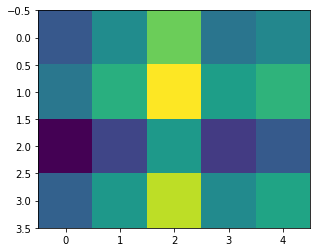

In [83]:
plt.imshow(ans[1:,:,0])

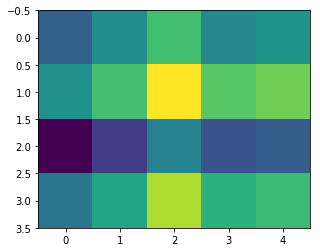

In [84]:
plt.imshow(ans[1:,:,1])